# Import

In [1]:
#First we import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set ()
import scipy
import scipy.stats as stats
import statistics

In [2]:
import matplotlib.lines
import math, matplotlib

In [3]:
#we load the data set
df = pd.read_csv("new-seismic-bumps.csv")

In [4]:
#We show the dataset
df

,magnitude,time
0,2000,1
1,3000,3
2,1000,6
3,4000,7
4,500,9
...,...,...
1115,90000,2554
1116,600,2555
1117,6000,2567
1118,1000,2569


In [5]:
#select threshold for min magnitude to be counted as event
m = 10000
df = df.loc[df['magnitude'] >= m]

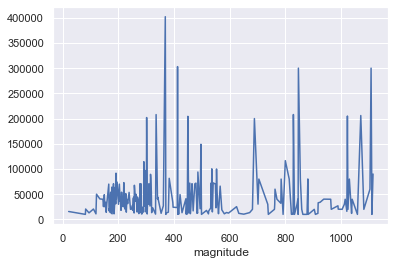

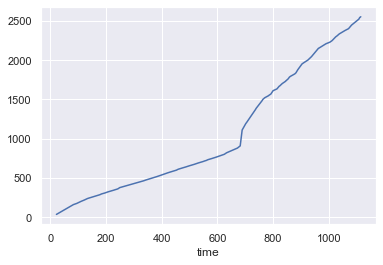

In [6]:
#we make a plot for every columns to visualize the data
for column in df.head():
    plt.plot(df[column])
    plt.xlabel(column)
    plt.show()

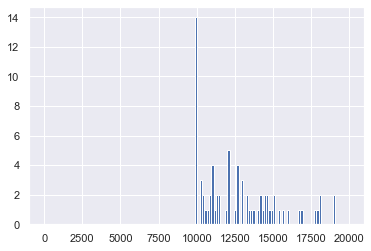

In [7]:
h=plt.hist(df["magnitude"], bins=np.arange(0,20000,150))
plt.show()

In [8]:
#vedo caratteristiche statistiche delle misure
from scipy.stats import skew
from scipy.stats import kurtosis

In [9]:
print(skew(df["magnitude"]))
print(kurtosis(df["magnitude"]))

3.4439438719943594
14.3501230067065


In [10]:
energy=df["magnitude"]-statistics.mean(df["magnitude"])

In [11]:
statistics.mean(df["magnitude"])

45045.17543859649

In [12]:
print(max(energy))

356954.8245614035


In [13]:
print(min(energy))

-35045.17543859649


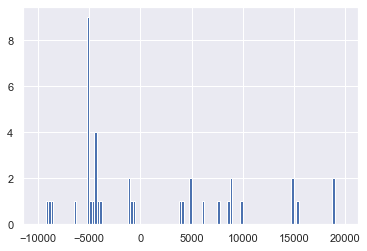

In [14]:
plt.hist(energy, bins=np.arange(-10000,20000,250))
plt.show()

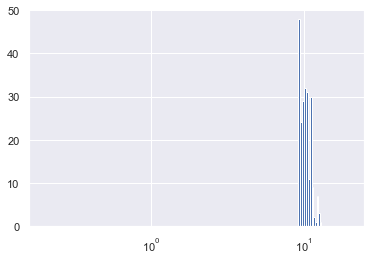

In [15]:
plt.hist(np.log(df["magnitude"]), bins=np.arange(-1,20,0.3))
plt.xscale("log")
plt.show()

In [16]:
t = df.time.diff()

In [17]:
df = df.to_numpy()

In [18]:
#select how long you want the data input from 0 to dfa[:, 0] (don't run this cell)
#dfa = dfa[:100]

In [19]:
df[:, 1]

array([  36,  160,  161,  176,  203,  216,  219,  239,  251,  254,  257,
        259,  263,  265,  267,  274,  275,  277,  278,  279,  280,  282,
        283,  284,  285,  286,  287,  296,  297,  298,  300,  302,  304,
        305,  306,  309,  316,  319,  323,  324,  326,  328,  330,  335,
        337,  340,  341,  342,  344,  346,  349,  351,  352,  354,  357,
        364,  377,  379,  380,  381,  384,  385,  386,  390,  392,  397,
        398,  401,  403,  404,  405,  406,  407,  410,  411,  412,  413,
        414,  415,  419,  420,  421,  422,  423,  425,  426,  428,  429,
        430,  431,  433,  434,  438,  439,  443,  445,  446,  448,  449,
        452,  453,  463,  465,  472,  473,  486,  494,  503,  505,  506,
        515,  518,  533,  535,  554,  555,  556,  557,  559,  566,  570,
        574,  590,  591,  594,  595,  597,  600,  608,  611,  613,  614,
        618,  622,  629,  633,  637,  638,  639,  640,  650,  653,  655,
        674,  683,  685,  692,  693,  695,  696,  6

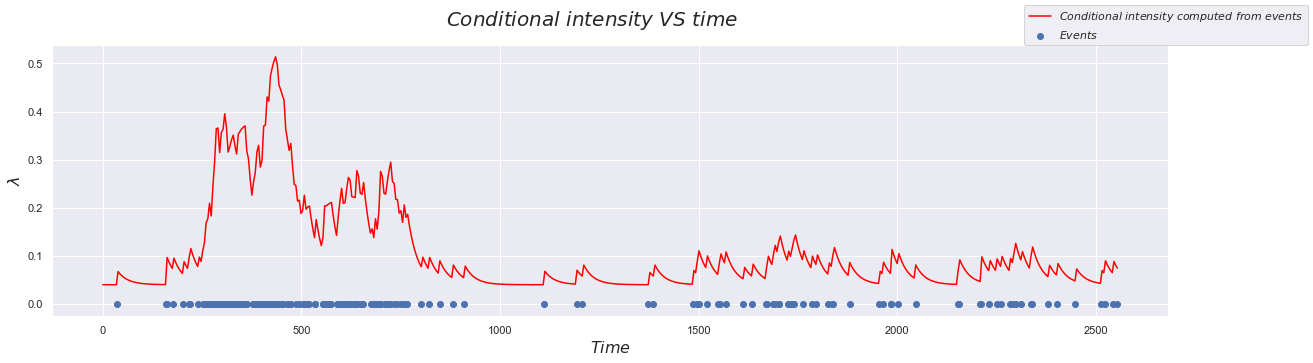

In [20]:
#mu = 0.07 # Parameter values as found in the article http://jheusser.github.io/2013/09/08/hawkes.html Hawkes Process section.
#alpha = 1.18
#beta = 1.79

mu = 0.04 
alpha = 0.03
beta = 0.04

EventTimes = df[:, 1]

" Compute conditional intensities for all times using the Hawkes process. "
timesOfInterest = np.linspace(0.0, df[-1,1], 600) # Times where the intensity will be sampled.
conditionalIntensities = [] # Conditional intensity for every epoch of interest.
for t in timesOfInterest:
     conditionalIntensities.append( mu + np.array( [alpha*math.exp(-beta*(t-ti)) if t > ti else 0.0 for ti in EventTimes] ).sum() ) # Find the contributions of all preceding events to the overall chance of another one occurring. All events that occur after t have no contribution.

" Plot the conditional intensity time history. "
fig = plt.figure(figsize=(20,5))
ax = fig.gca()

labelsFontSize = 16
ticksFontSize = 14

fig.suptitle(r"$Conditional\ intensity\ VS\ time$", fontsize=20)
ax.grid(True)
ax.set_xlabel(r'$Time$',fontsize=labelsFontSize)
ax.set_ylabel(r'$\lambda$',fontsize=labelsFontSize)
matplotlib.rc('xtick', labelsize=ticksFontSize) 
matplotlib.rc('ytick', labelsize=ticksFontSize)

eventsScatter = ax.scatter(EventTimes,np.ones(len(EventTimes))-1) # Just to indicate where the events took place.

ax.plot(timesOfInterest, conditionalIntensities, color='red', linestyle='solid', marker=None, markerfacecolor='blue', markersize=12)
fittedPlot = matplotlib.lines.Line2D([],[],color='red', linestyle='solid', marker=None,  markerfacecolor='blue', markersize=12)

fig.legend([fittedPlot, eventsScatter], [r'$Conditional\ intensity\ computed\ from\   events$', r'$Events$'])
plt.show()

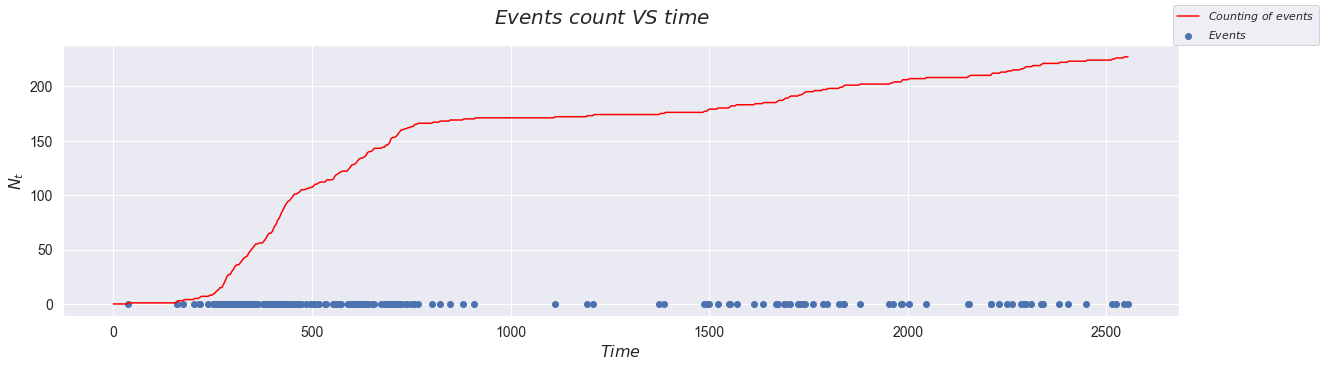

In [21]:

EventTimes = df[:, 1]

" Compute conditional intensities for all times using the Hawkes process. "
timesOfInterest = np.linspace(0.0, df[-1,1], 600) # Times where the intensity will be sampled.
conditionalIntensities = [] # Conditional intensity for every epoch of interest.
for t in timesOfInterest:
     conditionalIntensities.append(np.array( [(+1) if t > ti else 0.0 for ti in EventTimes] ).sum() ) # Find the contributions of all preceding events to the overall chance of another one occurring. All events that occur after t have no contribution.

" Plot the conditional intensity time history. "
fig = plt.figure(figsize=(20,5))
ax = fig.gca()

labelsFontSize = 16
ticksFontSize = 14

fig.suptitle(r"$Events\ count\ VS\ time$", fontsize=20)
ax.grid(True)
ax.set_xlabel(r'$Time$',fontsize=labelsFontSize)
ax.set_ylabel(r'$N_t$',fontsize=labelsFontSize)
matplotlib.rc('xtick', labelsize=ticksFontSize) 
matplotlib.rc('ytick', labelsize=ticksFontSize)

eventsScatter = ax.scatter(EventTimes,np.ones(len(EventTimes))-1) # Just to indicate where the events took place.

ax.plot(timesOfInterest, conditionalIntensities, color='red', linestyle='solid', marker=None, markerfacecolor='blue', markersize=12)
fittedPlot = matplotlib.lines.Line2D([],[],color='red', linestyle='solid', marker=None,  markerfacecolor='blue', markersize=12)

fig.legend([fittedPlot, eventsScatter], [r'$Counting\ of\ events$', r'$Events$'])
plt.show()

In [22]:
#we load the data set
df = pd.read_csv("new-seismic-bumps.csv")

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([2553.5, 2553.6, 2553.7, 2553.8, 2553.9, 2554. , 2554.1, 2554.2,
        2554.3, 2554.4, 2554.5]),
 <BarContainer object of 10 artists>)

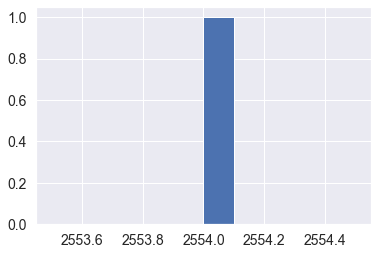

In [23]:
plt.hist(t)

In [24]:
t = df.time.diff(1).dropna()

In [25]:
for i in t:
    if i>12:
        print(i)

166.0
19.0
17.0
13.0
27.0
13.0
18.0
16.0
16.0
17.0
13.0
27.0
14.0
13.0


<AxesSubplot:>

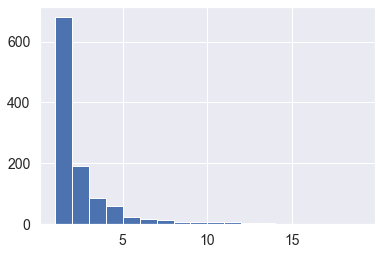

In [26]:
df.time.diff(1).hist(bins=np.arange(1,20))

In [27]:
df.time

0          1
1          3
2          6
3          7
4          9
        ... 
1115    2554
1116    2555
1117    2567
1118    2569
1119    2573
Name: time, Length: 1120, dtype: int64

In [28]:
params = stats.expon.fit(t, floc=1)
r = stats.expon.rvs(size=1119)
h = 

In [29]:
tt  = np.linspace(0,15,100)

'quantile quantile plot'

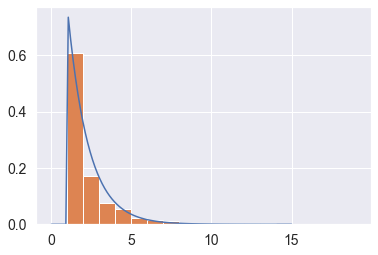

In [30]:
plt.plot(tt, stats.expon.pdf(tt,*params))
df.time.diff(1).hist(bins=np.arange(1,20),density=True)
'''quantile quantile plot'''

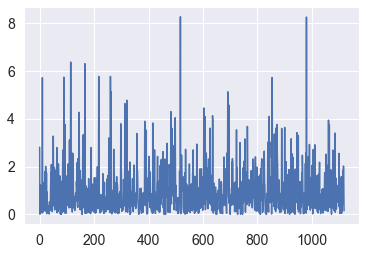

In [31]:
plt.plot(r)
r = pd.Series(r)
r = r.sort_values(ascending=True)

In [32]:
r = pd.Series(r)
r

727    0.000746
833    0.001029
332    0.002031
462    0.002916
156    0.003167
         ...   
217    5.764797
166    6.295047
114    6.364502
980    8.241391
517    8.255164
Length: 1119, dtype: float64

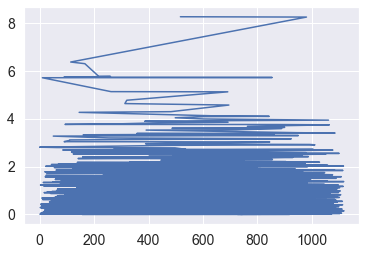

In [33]:
r = r.sort_values(ascending=True)
plt.plot(r)

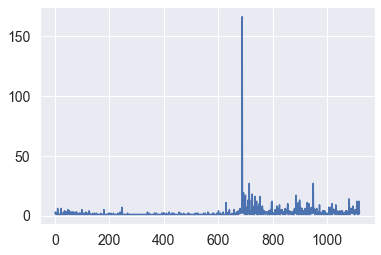

In [34]:
plt.plot(t)
t = t.sort_values(ascending=True)

In [35]:
n= 700
q = list(range(0,n))
q = [x / (n-1) for x in q]

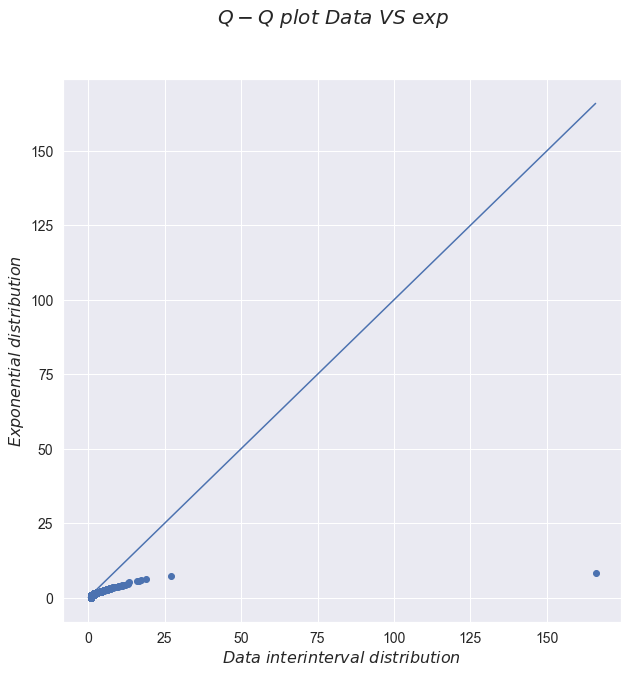

In [36]:
x = np.quantile(t, q)        
e = np.quantile(r, q) 

fig = plt.figure(figsize=(10,10))
ax = fig.gca()

ax.plot([0,max(x)], [0,max(x)])

labelsFontSize = 16
ticksFontSize = 14


fig.suptitle(r"$Q-Q\ plot\ Data\ VS\ exp$", fontsize=20)
ax.grid(True)
ax.set_xlabel(r'$Data\ interinterval\ distribution $',fontsize=labelsFontSize)
ax.set_ylabel(r'$Exponential\ distribution$',fontsize=labelsFontSize)
matplotlib.rc('xtick', labelsize=ticksFontSize) 
matplotlib.rc('ytick', labelsize=ticksFontSize)

eventsScatter = ax.scatter(x,e) # Just to indicate where the events took place.


plt.show()

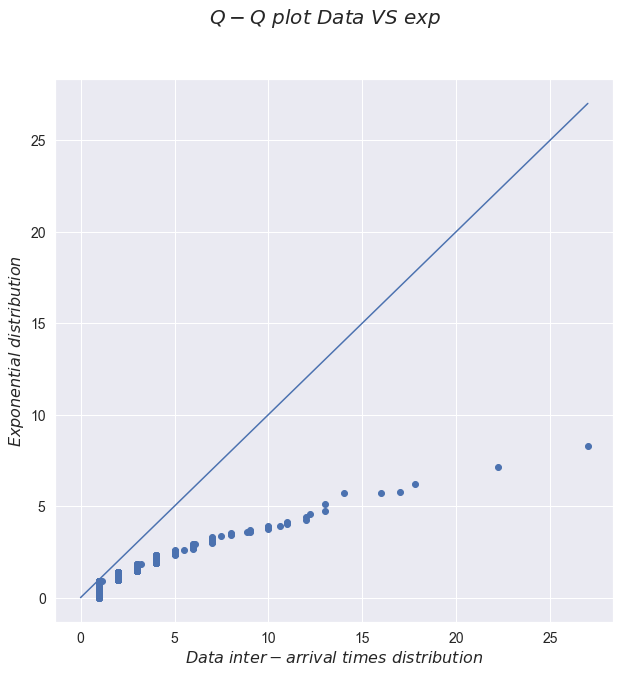

In [37]:
t1 = t
t1  = t1.drop([688])

x = np.quantile(t1, q)        
e = np.quantile(r, q) 

fig = plt.figure(figsize=(10,10))
ax = fig.gca()

ax.plot([0,max(x)], [0,max(x)])

labelsFontSize = 16
ticksFontSize = 14


fig.suptitle(r"$Q-Q\ plot\ Data\ VS\ exp$", fontsize=20)
ax.grid(True)
ax.set_xlabel(r'$Data\ inter-arrival\ times\ distribution $',fontsize=labelsFontSize)
ax.set_ylabel(r'$Exponential\ distribution$',fontsize=labelsFontSize)
matplotlib.rc('xtick', labelsize=ticksFontSize) 
matplotlib.rc('ytick', labelsize=ticksFontSize)

eventsScatter = ax.scatter(x,e) # Just to indicate where the events took place.


plt.show()

#fare anche con hawkes

(array([5.000e+00, 5.900e+01, 5.220e+02, 2.111e+03, 4.894e+03, 6.037e+03,
        4.189e+03, 1.750e+03, 3.790e+02, 5.400e+01]),
 array([-45.53798251, -36.19384275, -26.849703  , -17.50556324,
         -8.16142349,   1.18271627,  10.52685603,  19.87099578,
         29.21513554,  38.55927529,  47.90341505]),
 <BarContainer object of 10 artists>)

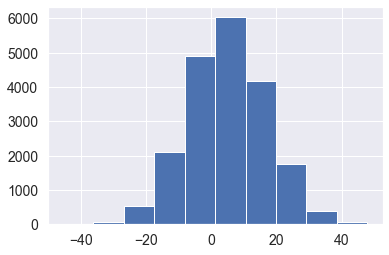

In [38]:
arr_g = stats.norm.rvs(loc = 5, scale = 12, size = 20_000)
plt.hist(arr_g)

In [39]:
arr_g

array([ 5.8939441 , 15.27864221, 12.62427932, ...,  1.7434308 ,
       -8.60249248,  4.04183981])

In [40]:
from scipy.optimize import minimize

In [41]:
def logl(params, x):
    mu, scale =params
    return - stats.norm.logpdf(x, mu, scale).sum()
    

In [42]:
mm = minimize(logl, x0= (3,7), args = arr_g)

In [43]:
np.sqrt(mm.hess_inv).diagonal()

array([0.05422343, 0.04607086])

In [44]:
mm.x

array([ 4.92506045, 11.96745539])

In [45]:
def logp(par, N, T):
    k, y = par
    return -N*np.log(k) + k*T +y

In [46]:
minimize(logp, x0 = (1,1), args = (1119,2573), bounds=((0.1,1),))

      fun: 2050.8209193426833
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00236469, 0.99998943])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 10
     njev: 17
   status: 0
  success: True
        x: array([0.43490129, 0.1       ])

In [47]:
def loglik(params, times):
    mu, alpha, beta = params
    logl = 0
    for x in times:
        ti = times[times<x]
        logl += np.log(mu + alpha*(np.exp(-beta*(x-ti))).sum())
    logl += -mu*times[-1] - (alpha/beta*(1-np.exp(-beta*(times[-1]-times)))).sum()
    print(logl, params)
    return -logl
   

In [48]:
xx = np.arange(100)

In [49]:
loglik((0.1, 1, 0.1), df.time.to_numpy())

-9623.111542076193 (0.1, 1, 0.1)


9623.111542076193

In [50]:
minimize(loglik,x0=(0.01, 0.002, 0.001), args = df.time.to_numpy(), bounds=((0,None),))

-2370.109842696188 [0.01  0.002 0.001]
-2370.1098343720787 [0.01000001 0.002      0.001     ]
-2370.1123363942957 [0.01       0.00200001 0.001     ]
-2370.104914546886 [0.01       0.002      0.00100001]
-4949.95916124963 [0.01168909 0.002      1.00099857]
-4949.95828251385 [0.0116891  0.002      1.00099857]
-4949.958858621785 [0.01168909 0.00200001 1.00099857]
-4949.959162225445 [0.01168909 0.002      1.00099858]
-4849.801480503793 [0.01055717 0.002      0.33086215]
-4849.800674723506 [0.01055718 0.002      0.33086215]
-4849.800303510753 [0.01055717 0.00200001 0.33086215]
-4849.801488907496 [0.01055717 0.002      0.33086216]
-4420.387178009996 [0.01018035 0.002      0.107774  ]
-4420.386628754418 [0.01018036 0.002      0.107774  ]
-4420.384608454459 [0.01018035 0.00200001 0.107774  ]
-4420.387228200949 [0.01018035 0.002      0.10777401]
-3670.0832954140956 [0.01005604 0.002      0.03417717]
-3670.0830232234052 [0.01005605 0.002      0.03417717]
-3670.079518708414 [0.01005604 0.00200001

      fun: 1877.3424165232364
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00065938, -0.01559783,  0.01623448])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 112
      nit: 22
     njev: 28
   status: 0
  success: True
        x: array([0.0426971 , 0.03236206, 0.03563331])